## Caculate Rountrip times for the REST2 and REST3 Trajectories ##

In [45]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, rc_context
#plt.style.use(os.path.abspath('./presentation.mplstyle'))
import math 
import numpy as np

In [62]:
# calculate round trip times stack
def calc_round_trip_stack(file, reps = 20 ):
    """
    calculate the roundtrip time of a trajectory.
    xvg = the index xvg file with the exchanges at every 80ps
    """
    # unpack the xvg file 
    rep_dict = {} # for counting 
    xvg = np.loadtxt(file ,comments=["@", "#"])[:,1:]

    for i in range(reps): 
        rep = xvg[:,i]
        rep_dict[i] = 0 
        stack = []
        for e in rep:
            # reinstantiate list 
            if len(stack) == reps: 
                rep_dict[i] += 0.5
                stack = []
            elif int(e) not in stack: 
                stack.append(int(e))
    
    return rep_dict

# get temperatures 
def get_temps(nreps,tmax= 500, tmin= 300):
    """
    Compute the temperatures 
    """
    temps = []
    for i in range(0,nreps): 
        t=tmin*math.exp(i*math.log(tmax/tmin)/(nreps-1))
        temps.append(round(t,2))
    return temps

@rc_context({"axes.labelsize":18, "xtick.labelsize":16, "ytick.labelsize":16})
def plt_round_trip(rep_dict, reps = 20, title= "IAPP WT + inhibitor Roundtrips"): 
    f, ax = plt.subplots(figsize=(8,6))
    heights = [float(i) for i in rep_dict.values()]
    all_mean = np.mean(heights)
    all_stdev = np.std(heights)
    y = [int(all_mean)]*reps
    yerr = [int(2*all_stdev)]*reps
    x = np.arange(0,reps)
    ax.plot(x,y,"r")
    ax.fill_between(x, np.array(y) + yerr, np.array(y) - yerr, alpha=0.2, color="r")
    ax.bar(rep_dict.keys(), heights, width=0.5)
    ax.set_xticks(np.arange(0,reps),np.arange(1,reps+1))
    ax.set_xlabel("Replica", fontsize=18)
    ax.set_ylabel("Roundtrip Count", fontsize=18)
    ax.set_title(title, fontsize=20)
    return ax

def plt_rep_timecourse(xvg_file, nreps = 20): 
    """
    plt the timecourse over replicas
    """
    # plot the timecourse 
    temperature = get_temps(nreps)
    xvg_8reps = np.loadtxt(xvg_file ,comments=["@", "#"])[:,1:]

    fig, ax = plt.subplots(5, 4, figsize=(32, 28), sharex=True, sharey=True)
    for val in range(nreps):
            p, q = np.unravel_index(val,(5, 4))
            rep = xvg_8reps[:,val]
            ax[p, q].plot(rep[::500], label= str(temperature[val]) + " K ")
            a='Replica : '+str(temperature[val])+' $K$'
            ax[p,q].set_title(a,size=28)
    
    return ax

In [49]:
# temperature replcia file 
rep_temp_16reps = "/Users/f006j60/Robustelli_Group/IAPP/wt/REST3/replica_temp_rest3_16reps.xvg"
rep_dict = calc_round_trip_stack(rep_temp_16reps, 16)

<Axes: title={'center': 'IAPP WT REST3, 16 reps'}, xlabel='Replica', ylabel='Roundtrip Count'>

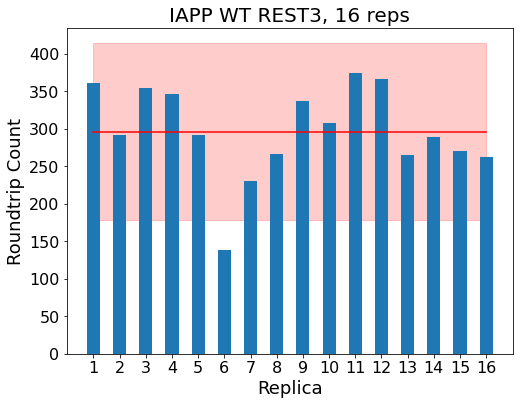

In [50]:
plt_round_trip(rep_dict,16, "IAPP WT REST3, 16 reps")

array([[<Axes: title={'center': 'Replica : 300.0 $K$'}>,
        <Axes: title={'center': 'Replica : 310.39 $K$'}>,
        <Axes: title={'center': 'Replica : 321.14 $K$'}>,
        <Axes: title={'center': 'Replica : 332.27 $K$'}>],
       [<Axes: title={'center': 'Replica : 343.78 $K$'}>,
        <Axes: title={'center': 'Replica : 355.69 $K$'}>,
        <Axes: title={'center': 'Replica : 368.01 $K$'}>,
        <Axes: title={'center': 'Replica : 380.76 $K$'}>],
       [<Axes: title={'center': 'Replica : 393.95 $K$'}>,
        <Axes: title={'center': 'Replica : 407.6 $K$'}>,
        <Axes: title={'center': 'Replica : 421.72 $K$'}>,
        <Axes: title={'center': 'Replica : 436.33 $K$'}>],
       [<Axes: title={'center': 'Replica : 451.44 $K$'}>,
        <Axes: title={'center': 'Replica : 467.08 $K$'}>,
        <Axes: title={'center': 'Replica : 483.26 $K$'}>,
        <Axes: title={'center': 'Replica : 500.0 $K$'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

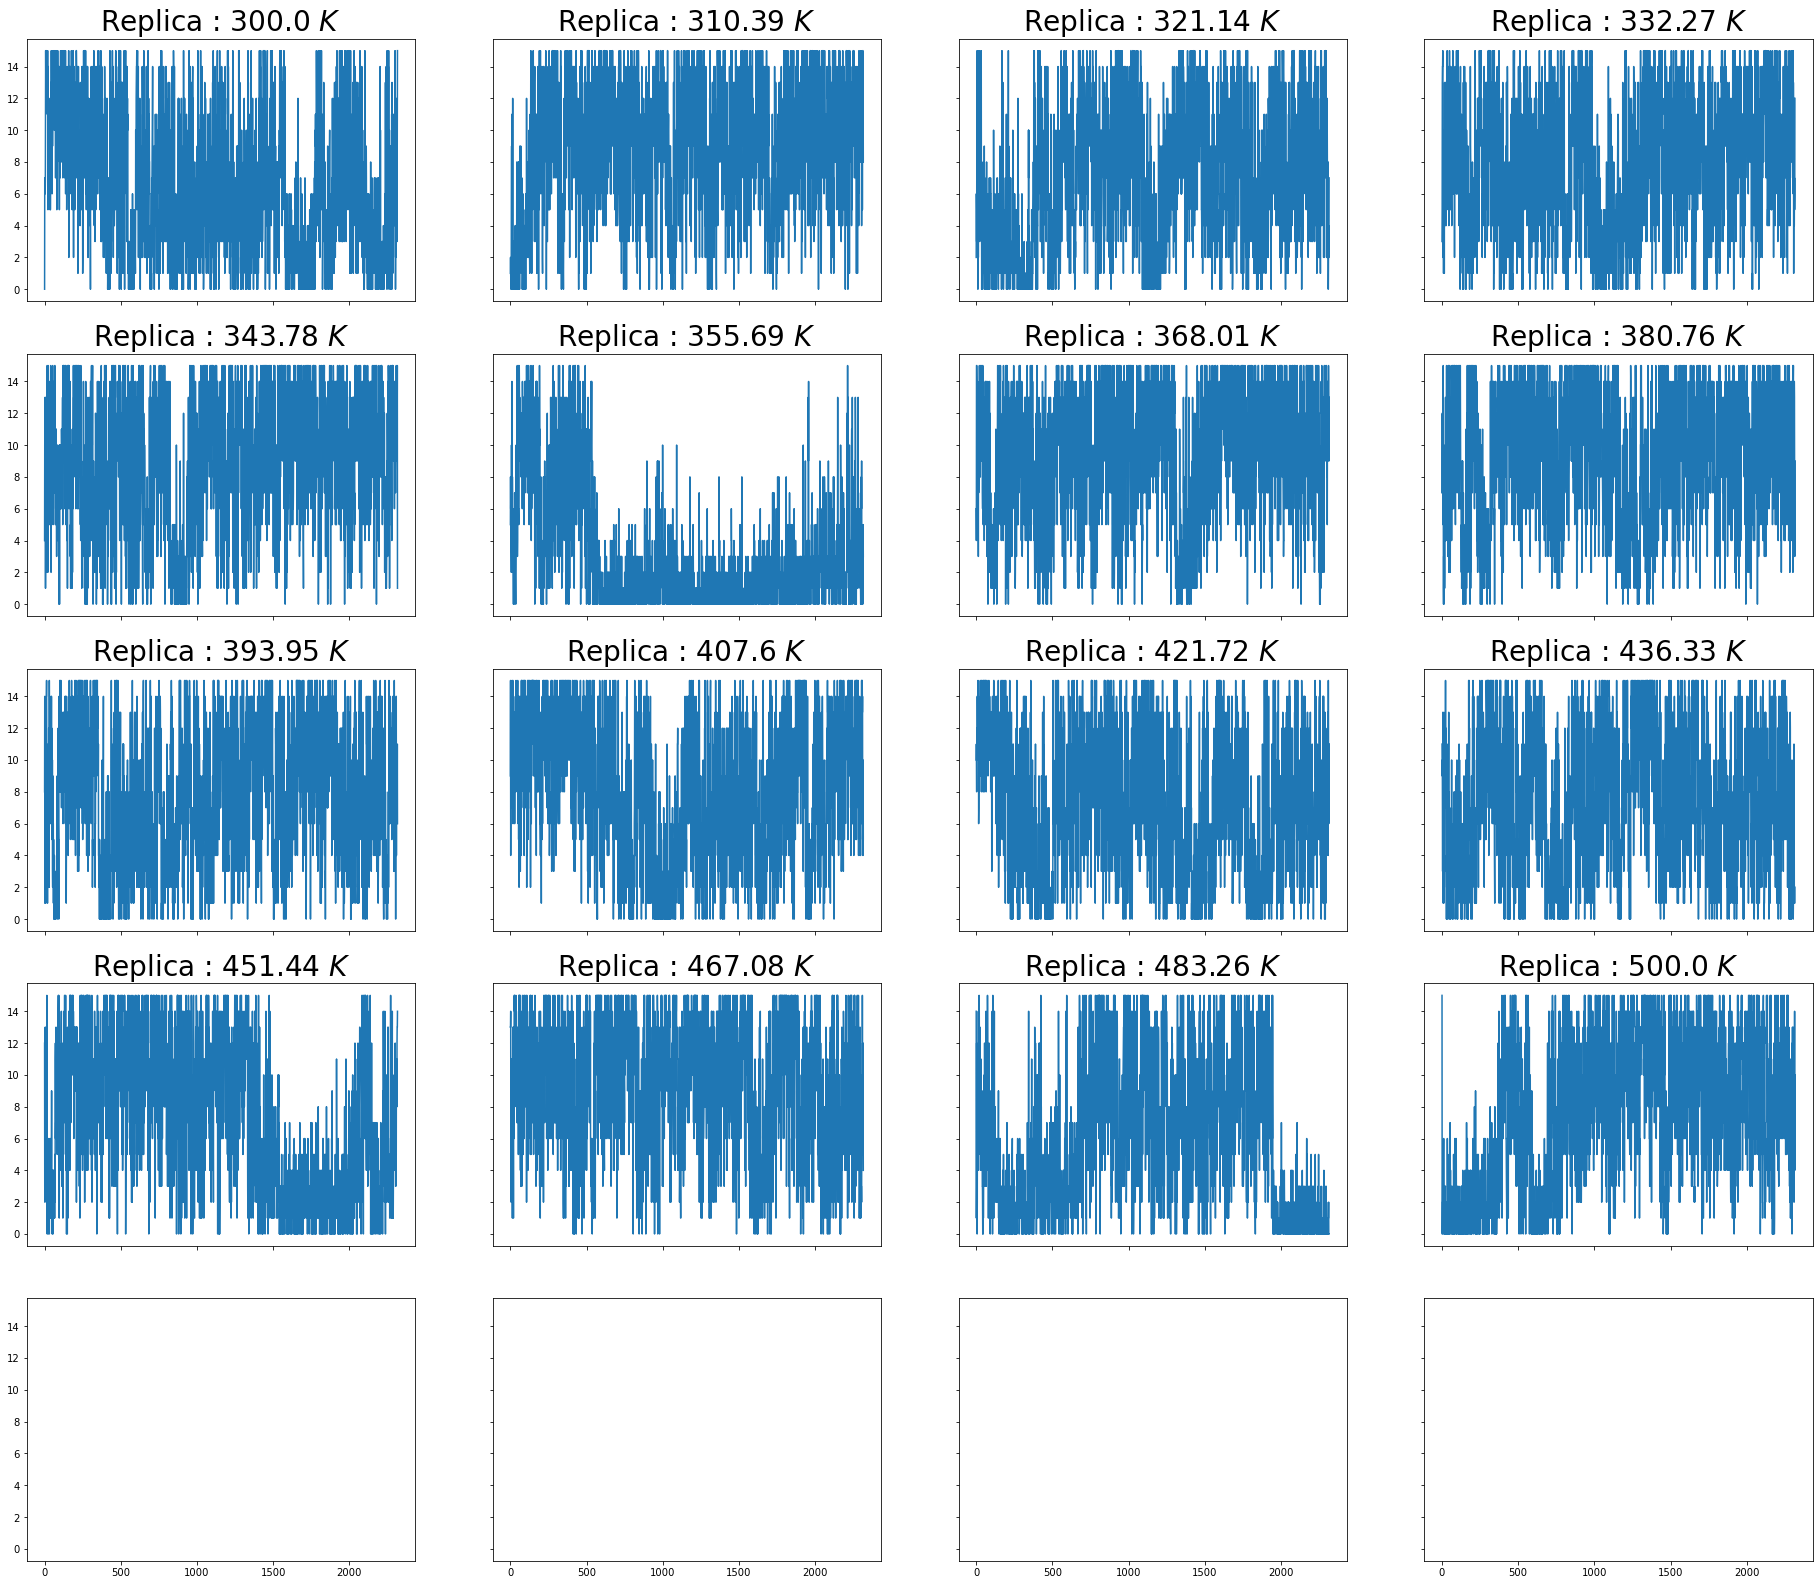

In [63]:
# plot the timecourse 
nreps = 16
plt_rep_timecourse(rep_temp_16reps, nreps)

In [64]:
# temperature replcia file 
rep_temp_8reps = "/Users/f006j60/Robustelli_Group/IAPP/wt/REST3/replica_temp_rest3_8reps.xvg"
rep_dict = calc_round_trip_stack(rep_temp_8reps, 8)

<Axes: title={'center': 'IAPP WT REST3, 8 reps'}, xlabel='Replica', ylabel='Roundtrip Count'>

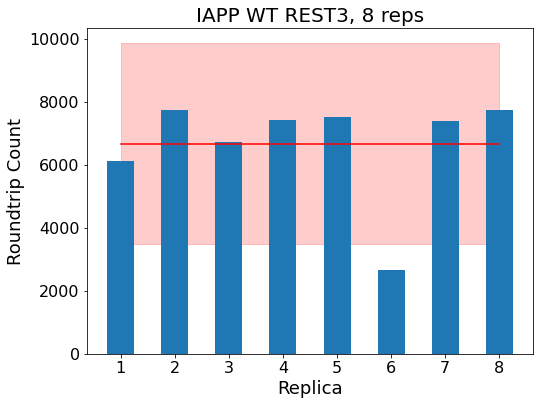

In [65]:
plt_round_trip(rep_dict,8, "IAPP WT REST3, 8 reps")

array([[<Axes: title={'center': 'Replica : 300.0 $K$'}>,
        <Axes: title={'center': 'Replica : 322.71 $K$'}>,
        <Axes: title={'center': 'Replica : 347.14 $K$'}>,
        <Axes: title={'center': 'Replica : 373.42 $K$'}>],
       [<Axes: title={'center': 'Replica : 401.69 $K$'}>,
        <Axes: title={'center': 'Replica : 432.1 $K$'}>,
        <Axes: title={'center': 'Replica : 464.81 $K$'}>,
        <Axes: title={'center': 'Replica : 500.0 $K$'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

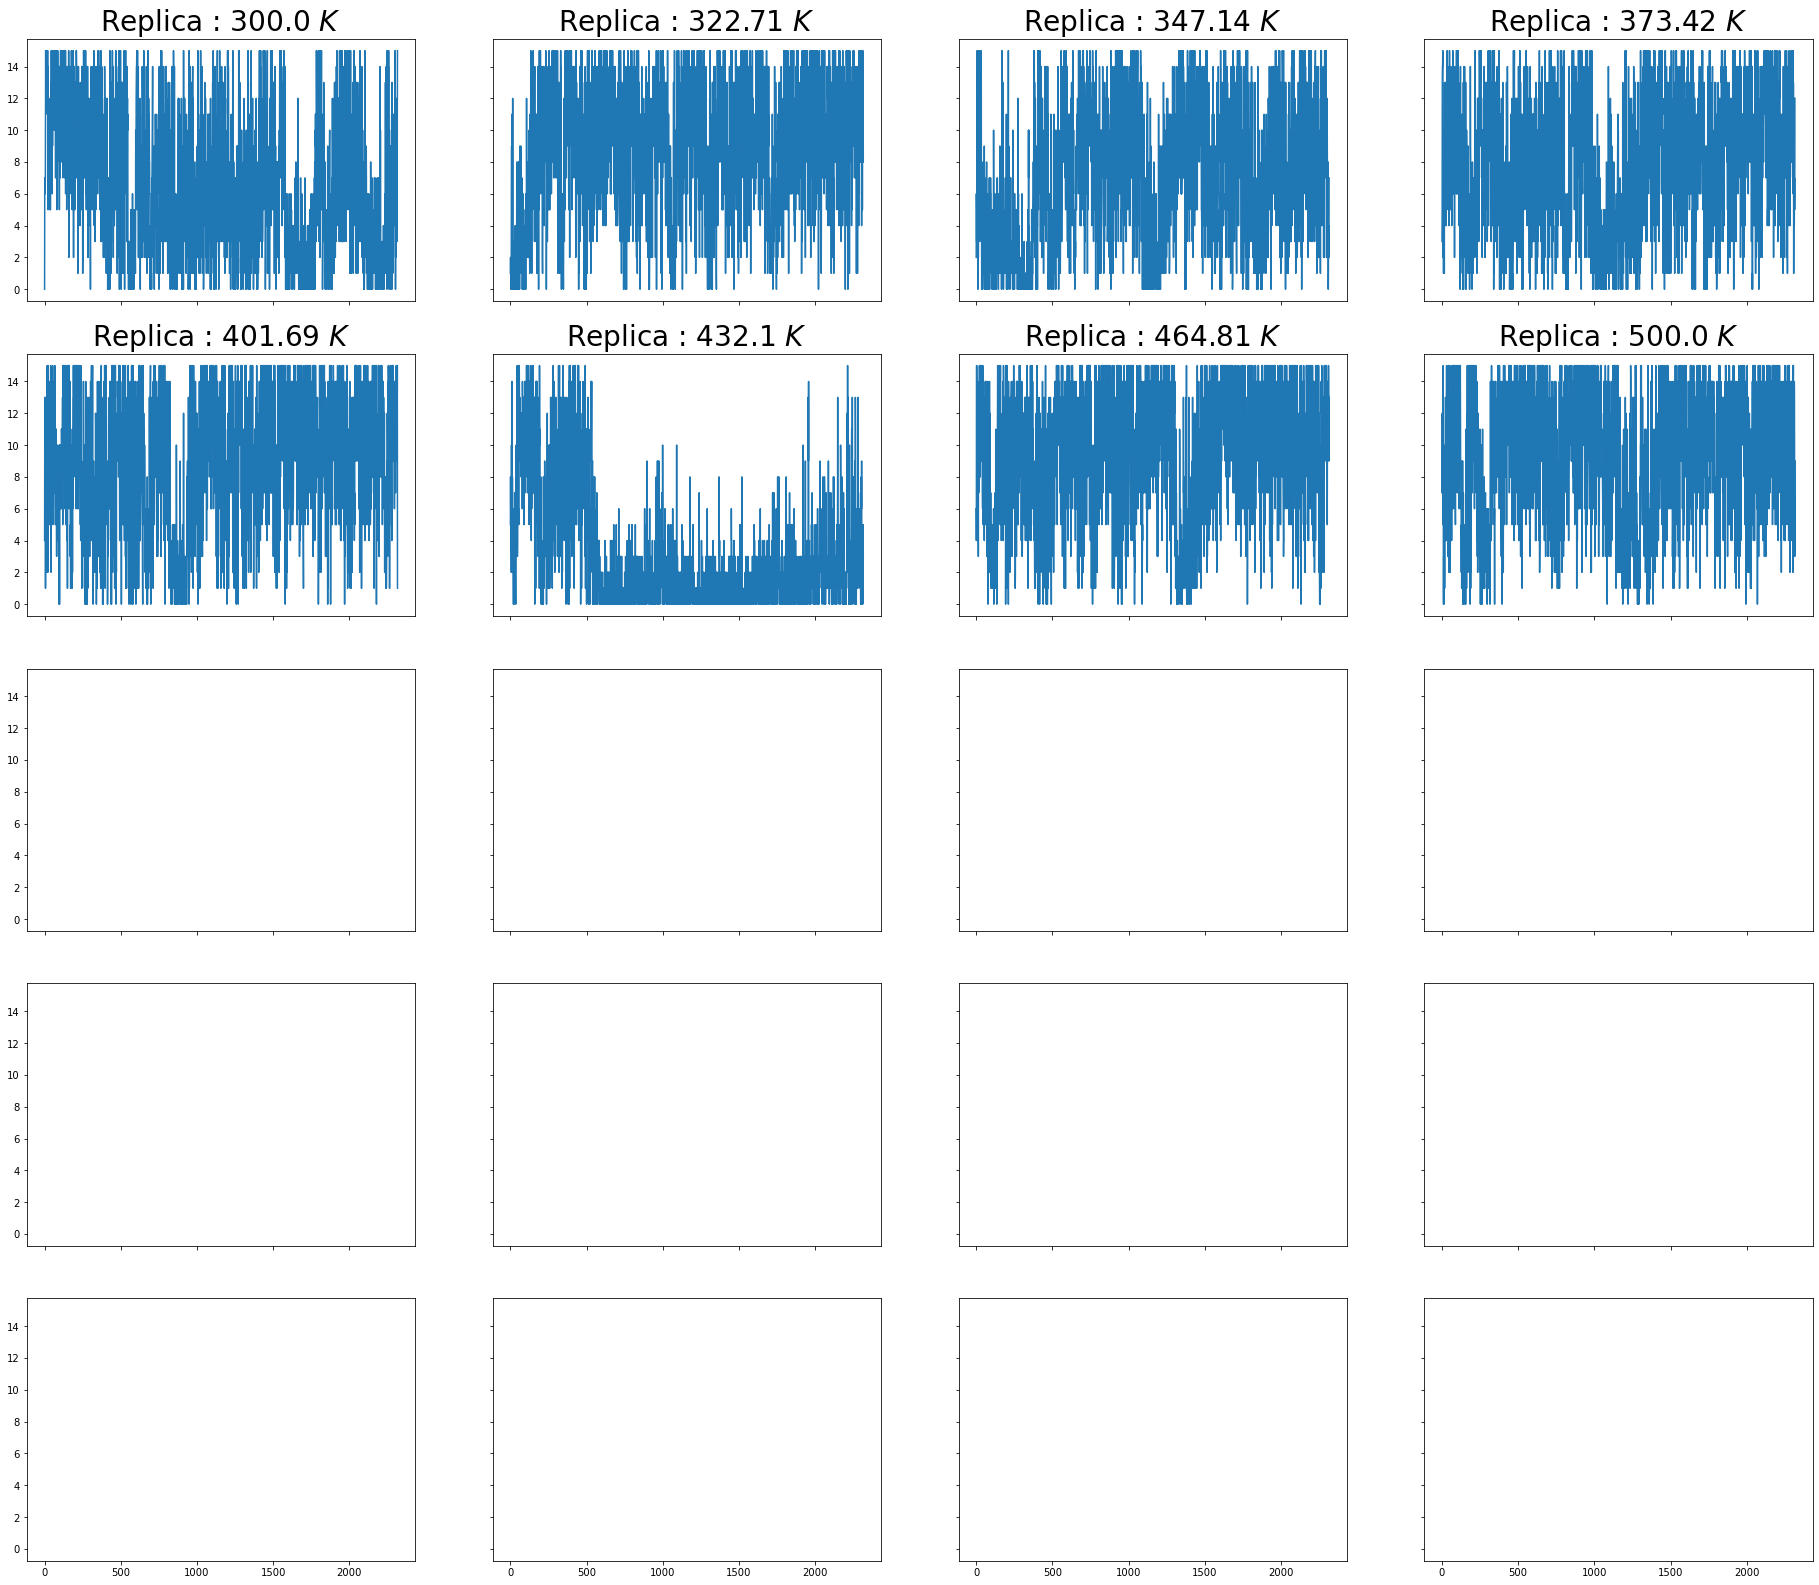

In [66]:
nreps = 8
plt_rep_timecourse(rep_temp_8reps, nreps)

In [67]:
# temperature replcia file 
rep_temp_20reps = "/Users/f006j60/Robustelli_Group/IAPP/wt/replica_temp_rest2_4.3us.xvg"
rep_dict = calc_round_trip_stack(rep_temp_20reps, 20)

<Axes: title={'center': 'IAPP WT REST2, 20 reps'}, xlabel='Replica', ylabel='Roundtrip Count'>

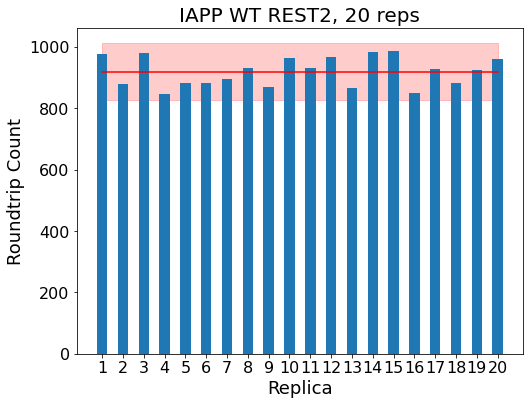

In [60]:
plt_round_trip(rep_dict,20, "IAPP WT REST2, 20 reps")

array([[<Axes: title={'center': 'Replica : 300.0 $K$'}>,
        <Axes: title={'center': 'Replica : 308.18 $K$'}>,
        <Axes: title={'center': 'Replica : 316.57 $K$'}>,
        <Axes: title={'center': 'Replica : 325.2 $K$'}>],
       [<Axes: title={'center': 'Replica : 334.06 $K$'}>,
        <Axes: title={'center': 'Replica : 343.16 $K$'}>,
        <Axes: title={'center': 'Replica : 352.52 $K$'}>,
        <Axes: title={'center': 'Replica : 362.12 $K$'}>],
       [<Axes: title={'center': 'Replica : 371.99 $K$'}>,
        <Axes: title={'center': 'Replica : 382.13 $K$'}>,
        <Axes: title={'center': 'Replica : 392.54 $K$'}>,
        <Axes: title={'center': 'Replica : 403.24 $K$'}>],
       [<Axes: title={'center': 'Replica : 414.22 $K$'}>,
        <Axes: title={'center': 'Replica : 425.51 $K$'}>,
        <Axes: title={'center': 'Replica : 437.11 $K$'}>,
        <Axes: title={'center': 'Replica : 449.02 $K$'}>],
       [<Axes: title={'center': 'Replica : 461.26 $K$'}>,
        <Axe

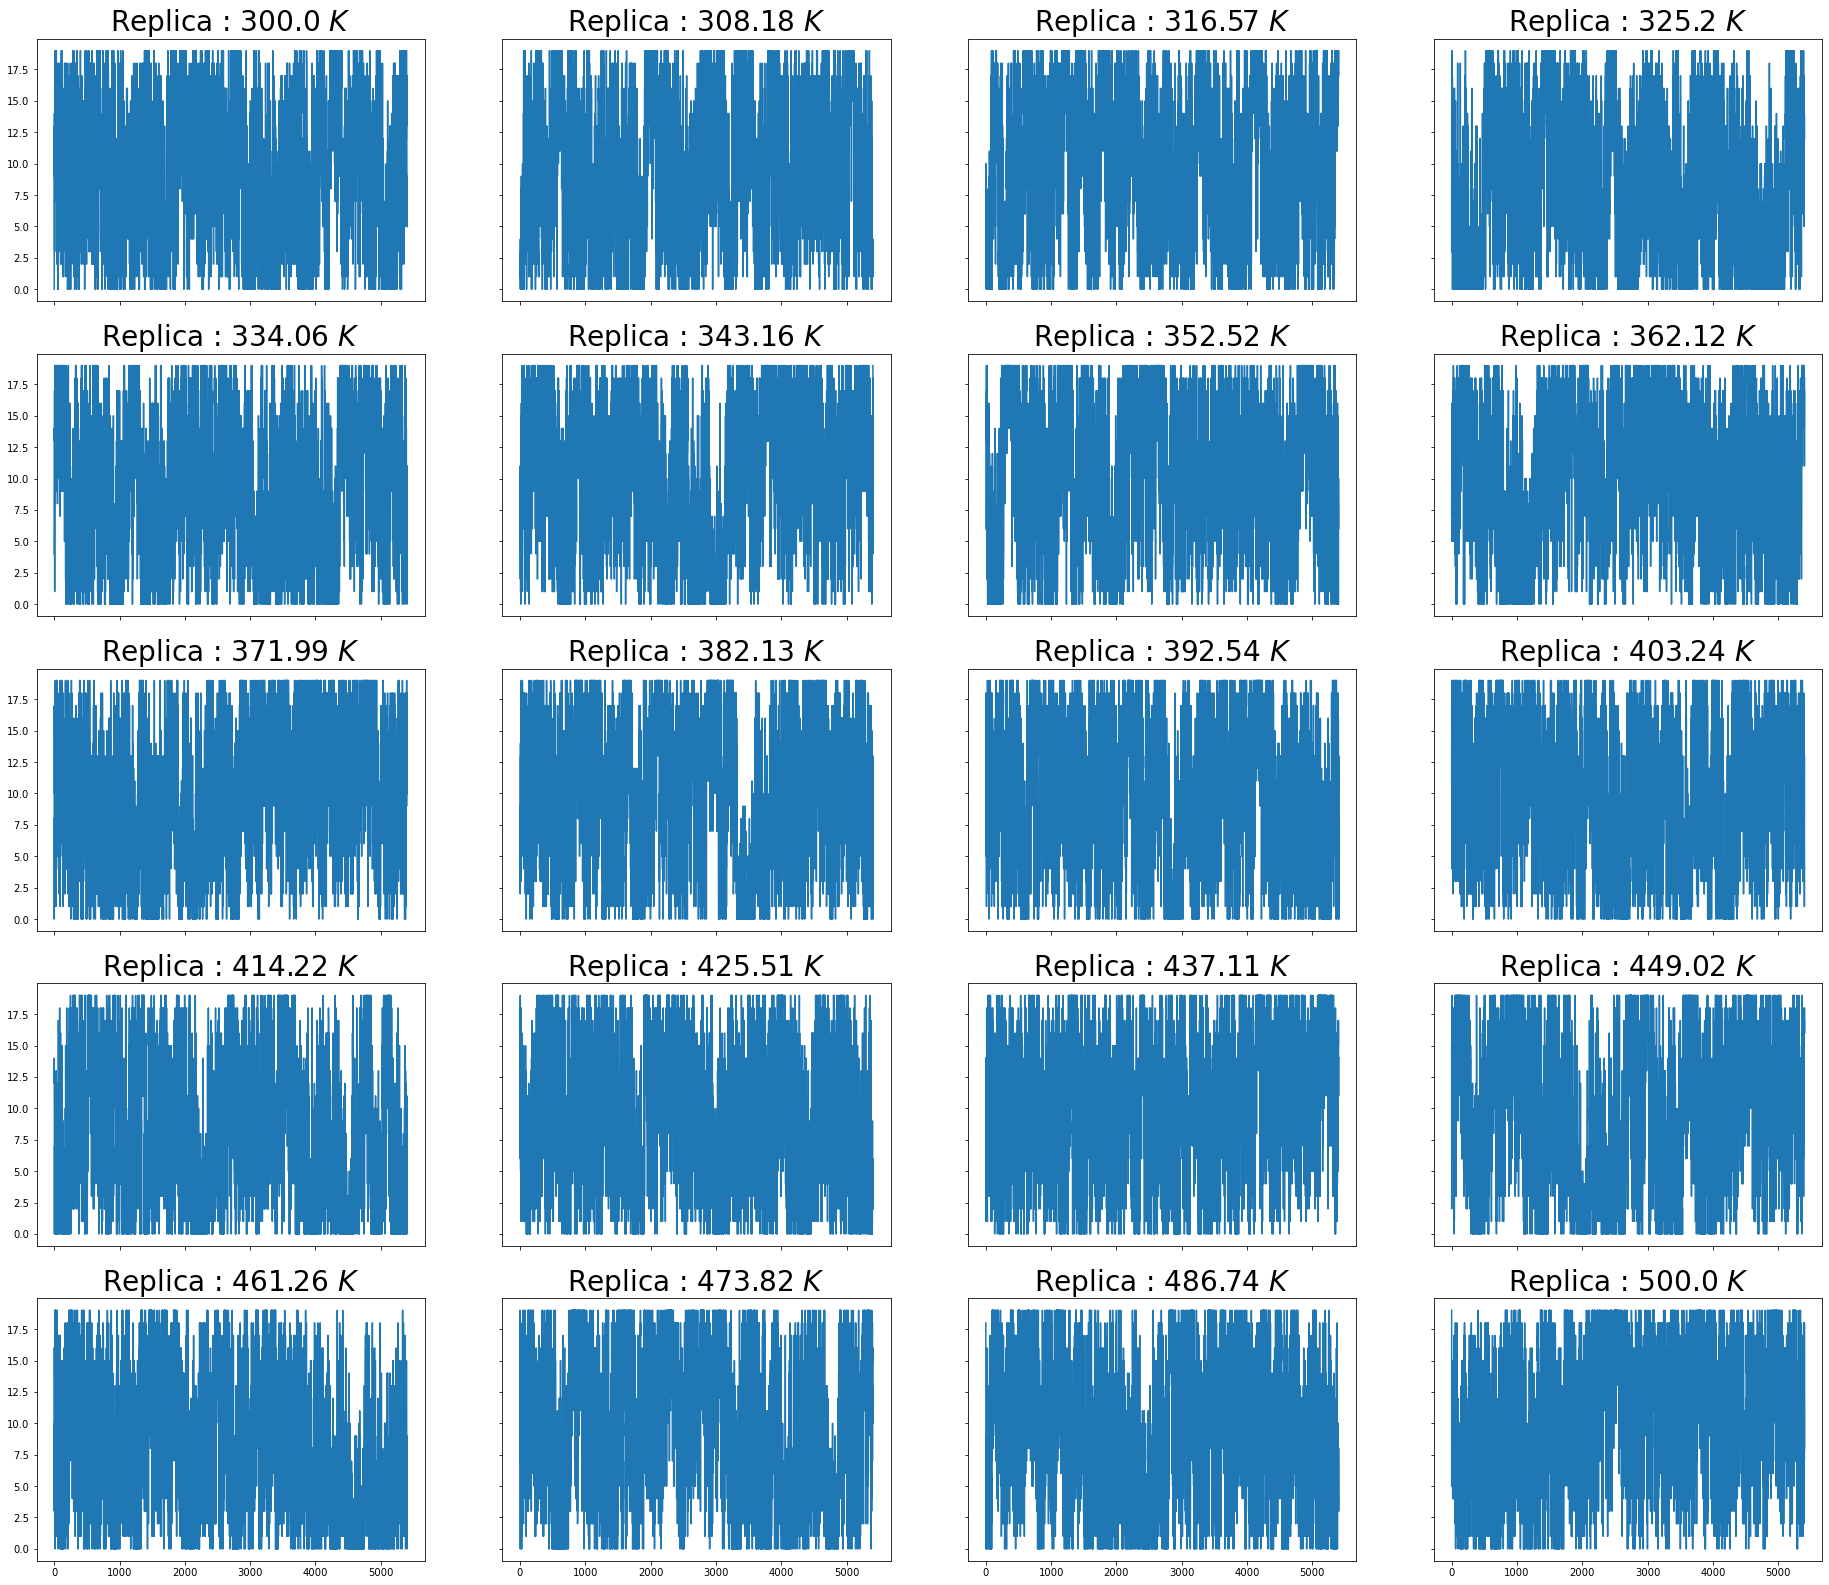

In [68]:
nreps = 20
plt_rep_timecourse(rep_temp_20reps, nreps)